In [14]:
#Se revisa el archivo CSV para eliminar filas vacías y ajustar los nombres de las columnas
import pandas as pd

df = pd.read_csv('solucion.csv', sep=';', skip_blank_lines=True)
df = df.dropna(how='all')
df.columns = ["t", "x", "u"]
df


t         x         u
0     0 -0.714286  0.555227
1     0 -0.428571  0.816357
2     0 -0.142857  0.959777
3     0  0.142857  0.959266
4     0  0.428571  0.819372
..   ..       ...       ...
786  98 -0.142857  0.455155
787  98  0.142857  0.597639
788  98  0.428571  0.735011
789  98  0.714286  0.868485
790  98  1.000000  1.000000

[791 rows x 3 columns]

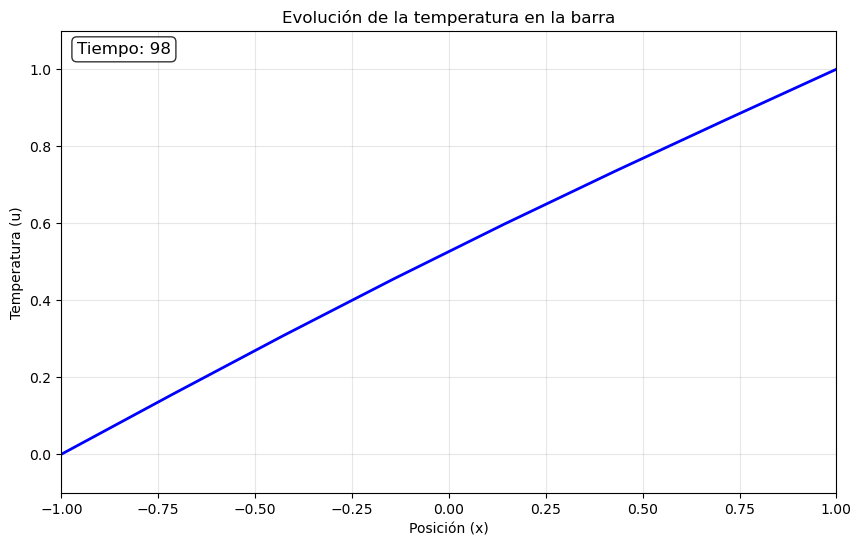

In [15]:
# Visualización de la solución usando Matplotlib y FuncAnimation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Leer los datos del archivo CSV
df = pd.read_csv('solucion.csv', delimiter=';')
df = df.dropna(how='all')
df.columns = ["t", "x", "u"]

# Obtener los tiempos únicos y ordenarlos
times = df['t'].unique()
times.sort()

# Configurar la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Posición (x)')
ax.set_ylabel('Temperatura (u)')
ax.set_title('Evolución de la temperatura en la barra')
ax.grid(True, alpha=0.3)

# Establecer límites del gráfico
ax.set_xlim(df['x'].min(), df['x'].max())
ax.set_ylim(df['u'].min() - 0.1, df['u'].max() + 0.1)

# Línea inicial
line, = ax.plot([], [], 'b-', linewidth=2)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12,
                    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

# Función de inicialización
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

# Función de animación
def animate(i):
    # Obtener datos para el tiempo actual
    current_time = times[i]
    data = df[df['t'] == current_time]
    
    # Actualizar línea
    line.set_data(data['x'], data['u'])
    
    # Actualizar texto de tiempo
    time_text.set_text(f'Tiempo: {current_time}')
    
    return line, time_text

# Crear la animación
ani = FuncAnimation(fig, animate, frames=len(times),
                    init_func=init, blit=True, interval=100)

# Mostrar la animación en el notebook
HTML(ani.to_jshtml())

# Para guardar la animación como GIF (opcional)
# ani.save('difusion_animacion.gif', writer='pillow', fps=10)